<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape

(545, 13)

In [ ]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(112)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
print(df_train.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
print("Columns in df_test:", df_test.columns)

Columns in df_test: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


# Problem 1a

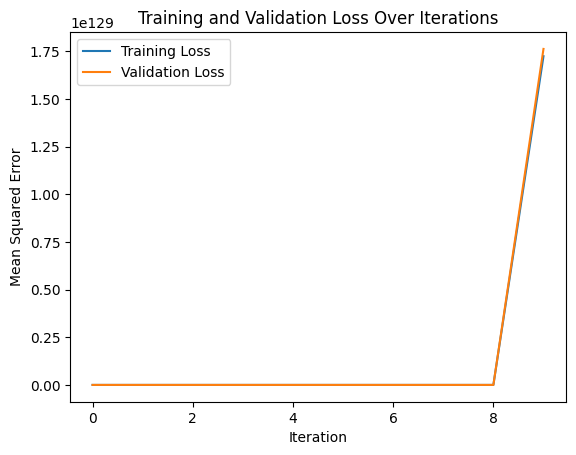

Best parameters: [-1.23275857e+57 -7.44902747e+60 -3.67581987e+57 -1.64032516e+57
 -2.27151447e+57 -1.05213810e+57]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select the data for the specific input features and target output
selected_features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a = df_train[selected_features_a].values
y_a = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_a
y_train = y_a
X_val = df_test[selected_features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 10
m = len(X_train)

# initial values
theta_1a = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta_1a) - y_train)
    theta_1a -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta_1a) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta_1a) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best parameters: {theta_1a.ravel()}")


In [ ]:
print(df_train[selected_features_a])

     area  bedrooms  bathrooms  stories  parking
22   8050         3          1        1        1
41   6360         3          2        4        0
91   6750         2          1        1        2
118  6420         3          1        1        0
472  3630         4          1        2        3
..    ...       ...        ...      ...      ...
526  3180         2          1        1        0
53   5150         3          2        4        2
350  3420         2          1        2        1
79   6000         3          2        3        0
520  7700         2          1        1        0

[436 rows x 5 columns]


# Problem 1b

In [ ]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(112)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

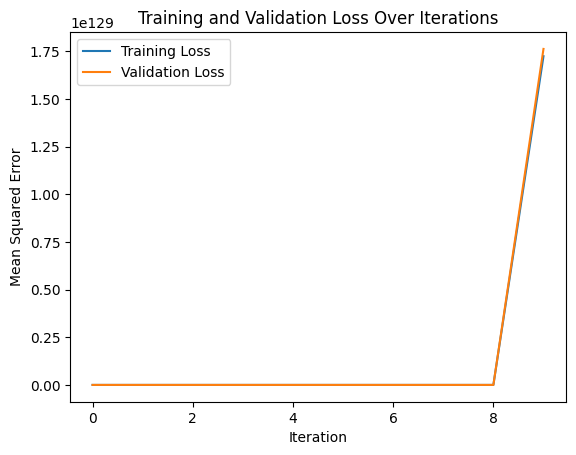

Best parameters: [-1.23275894e+57 -7.44902967e+60 -3.67582097e+57 -1.64032565e+57
 -2.27151515e+57 -1.11755814e+57 -2.42526586e+56 -4.54607878e+56
 -6.84321468e+55 -4.18999337e+56 -1.05213842e+57 -3.32903035e+56]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select the data for the specific input features and target output
selected_features_b = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']

X_b = df_train[selected_features_b].values
y_b = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_b
y_train = y_b
X_val = df_test[selected_features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 10
m = len(X_train)

# initial values (initialize to zero)
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best parameters: {theta.ravel()}")


In [ ]:
print(df_train[selected_features_b])


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
22   8050         3          1        1         1          1         1   
41   6360         3          2        4         1          0         0   
91   6750         2          1        1         1          1         1   
118  6420         3          1        1         1          0         1   
472  3630         4          1        2         1          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
526  3180         2          1        1         1          0         0   
53   5150         3          2        4         1          0         0   
350  3420         2          1        2         1          0         0   
79   6000         3          2        3         1          1         0   
520  7700         2          1        1         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  
22                 0                1        1      

# Problem 2a

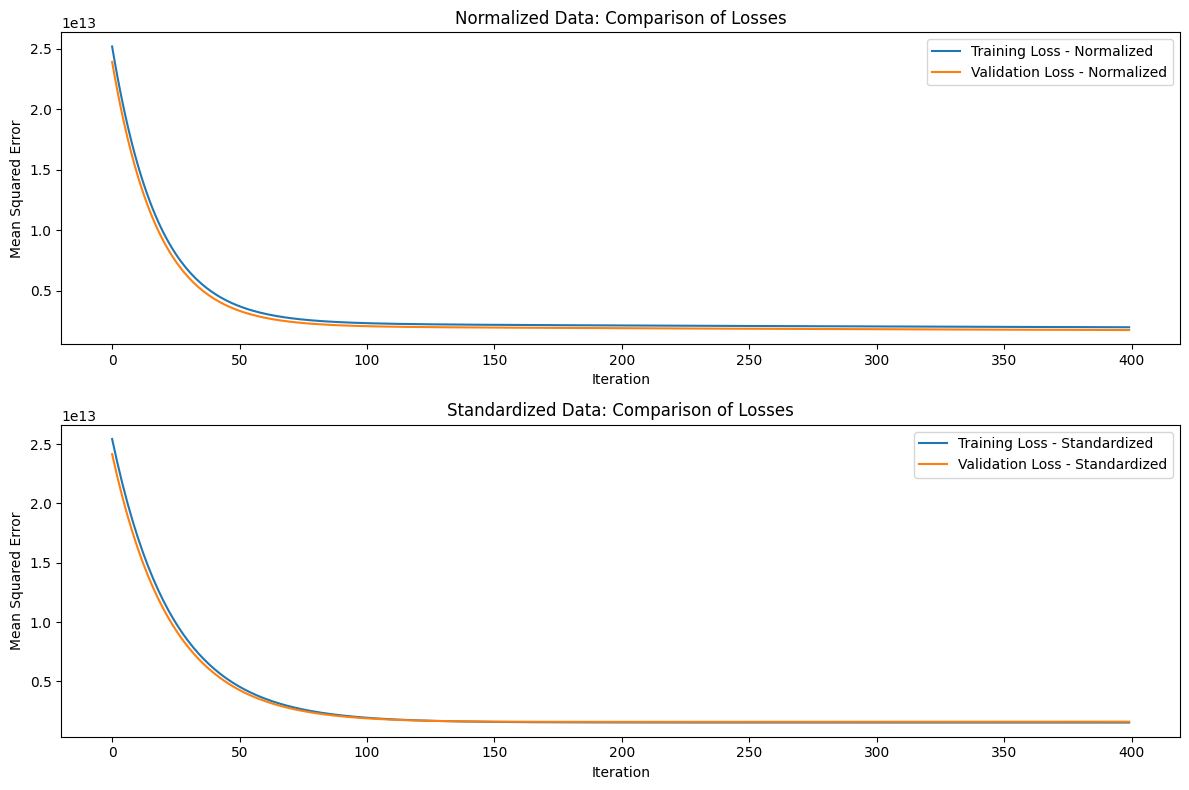

Best parameters with normalized data: [[3102934.82401482]
 [1491426.49627639]
 [1442708.77197704]
 [1124721.52000338]
 [1484495.44356197]
 [1299913.79376207]]
Best parameters with standardized data: [[4794245.72913299]
 [ 729185.71104053]
 [  82347.7889369 ]
 [ 640017.45087236]
 [ 462055.51281163]
 [ 287793.96205548]]


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Select the data for the specific input features and target output
selected_features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a = df_train[selected_features_a].values
y_a = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_a
y_train = y_a
X_val = df_test[selected_features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

def run_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# parameters
learning_rate = 0.01
n_iterations = 400

# Standardization
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_val_standardized = scaler_standard.transform(X_val)

# Normalization
scaler_normal = MinMaxScaler()
X_train_normalized = scaler_normal.fit_transform(X_train)
X_val_normalized = scaler_normal.transform(X_val)

# gradient descent for normalized data
train_losses_normalized, val_losses_normalized, theta_normalized = run_gradient_descent(X_train_normalized, y_train, X_val_normalized, y_val, learning_rate, n_iterations)
# gradient descent for standardized data
train_losses_standardized, val_losses_standardized, theta_standardized = run_gradient_descent(X_train_standardized, y_train, X_val_standardized, y_val, learning_rate, n_iterations)

# Plotting for Normalized Data
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_losses_normalized, label="Training Loss - Normalized")
plt.plot(val_losses_normalized, label="Validation Loss - Normalized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Data: Comparison of Losses")

# Plotting for Standardized Data
plt.subplot(2, 1, 2)
plt.plot(train_losses_standardized, label="Training Loss - Standardized")
plt.plot(val_losses_standardized, label="Validation Loss - Standardized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data: Comparison of Losses")

plt.tight_layout()
plt.show()

# Print the best parameters
print("Best parameters with normalized data:", theta_normalized)
print("Best parameters with standardized data:", theta_standardized)



# Problem 2b

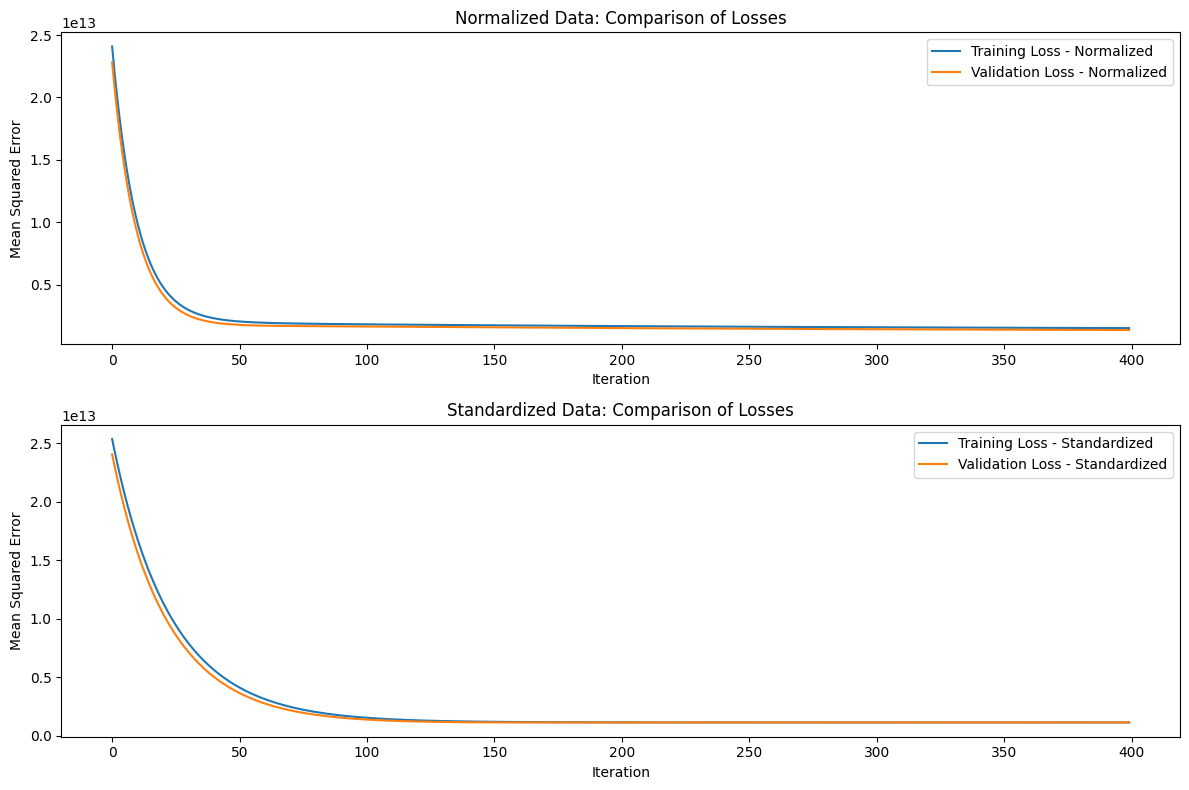

Best parameters with normalized data: [[1807893.80191568]
 [ 940116.94303181]
 [ 978258.96556795]
 [ 949219.66558327]
 [1114957.96320855]]
Best parameters with standardized data: [[4794245.72913299]
 [ 531244.58688404]
 [  76176.69171388]
 [ 577492.42297888]
 [ 364432.50788554]]


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Select the data for the specific input features and target output
selected_features_b = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']

X_b = df_train[selected_features_b].values
y_b = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_b
y_train = y_b
X_val = df_test[selected_features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

def run_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# parameters
learning_rate = 0.01
n_iterations = 400

# Standardization
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_val_standardized = scaler_standard.transform(X_val)

# Normalization
scaler_normal = MinMaxScaler()
X_train_normalized = scaler_normal.fit_transform(X_train)
X_val_normalized = scaler_normal.transform(X_val)

# Run gradient descent for normalized data
train_losses_normalized, val_losses_normalized, theta_normalized = run_gradient_descent(X_train_normalized, y_train, X_val_normalized, y_val, learning_rate, n_iterations)
# Run gradient descent for standardized data
train_losses_standardized, val_losses_standardized, theta_standardized = run_gradient_descent(X_train_standardized, y_train, X_val_standardized, y_val, learning_rate, n_iterations)

# Plotting for Normalized Data
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_losses_normalized, label="Training Loss - Normalized")
plt.plot(val_losses_normalized, label="Validation Loss - Normalized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Data: Comparison of Losses")

# Plotting for Standardized Data
plt.subplot(2, 1, 2)
plt.plot(train_losses_standardized, label="Training Loss - Standardized")
plt.plot(val_losses_standardized, label="Validation Loss - Standardized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data: Comparison of Losses")

plt.tight_layout()
plt.show()

# Print the best parameters
print("Best parameters with normalized data:", theta_normalized[:5])
print("Best parameters with standardized data:", theta_standardized[:5])


# Problem 3a

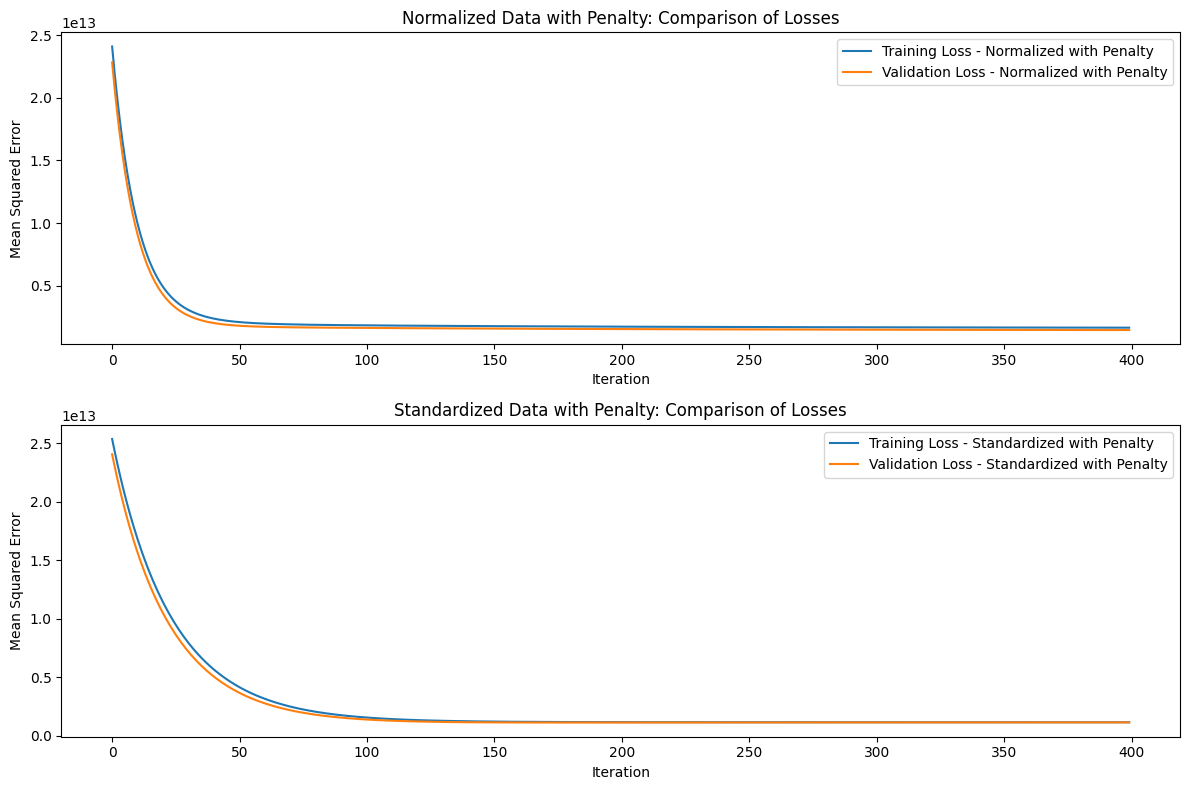

Best parameters with normalized data and penalty: [[2379802.47866593]
 [ 693285.91142857]
 [ 702956.44685778]
 [ 695661.06748252]
 [ 855355.83532203]]
Best parameters with standardized data and penalty: [[4794245.72913299]
 [ 496632.53849138]
 [ 100274.51863588]
 [ 535638.13443366]
 [ 342231.20152246]]


In [ ]:
# 1. Select the data for the specific input features and target output
selected_features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a = df_train[selected_features_a].values
y_a = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_a
y_train = y_a
X_val = df_test[selected_features_a].values
y_val = df_test['price'].values.reshape(-1, 1)
# gradient descent with penalty
def run_gradient_descent_with_penalty(X_train, y_train, X_val, y_val, learning_rate, n_iterations, penalty):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        gradients[1:] += 2 * penalty * theta[1:]

        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# parameters
learning_rate = 0.01
n_iterations = 400
penalty = 0.1

# Run gradient descent for both normalized and standardized data with penalty
train_losses_normalized_penalty, val_losses_normalized_penalty, theta_normalized_penalty = run_gradient_descent_with_penalty(X_train_normalized, y_train, X_val_normalized, y_val, learning_rate, n_iterations, penalty)
train_losses_standardized_penalty, val_losses_standardized_penalty, theta_standardized_penalty = run_gradient_descent_with_penalty(X_train_standardized, y_train, X_val_standardized, y_val, learning_rate, n_iterations, penalty)

# Plotting for Normalized Data with penalty
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_losses_normalized_penalty, label="Training Loss - Normalized with Penalty")
plt.plot(val_losses_normalized_penalty, label="Validation Loss - Normalized with Penalty")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Data with Penalty: Comparison of Losses")

# Plotting for Standardized Data with penalty
plt.subplot(2, 1, 2)
plt.plot(train_losses_standardized_penalty, label="Training Loss - Standardized with Penalty")
plt.plot(val_losses_standardized_penalty, label="Validation Loss - Standardized with Penalty")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data with Penalty: Comparison of Losses")

plt.tight_layout()
plt.show()

# Print the best parameters
print("Best parameters with normalized data and penalty:", theta_normalized_penalty[:5])
print("Best parameters with standardized data and penalty:", theta_standardized_penalty[:5])


In [ ]:
print(df_train.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


# Problem 3b

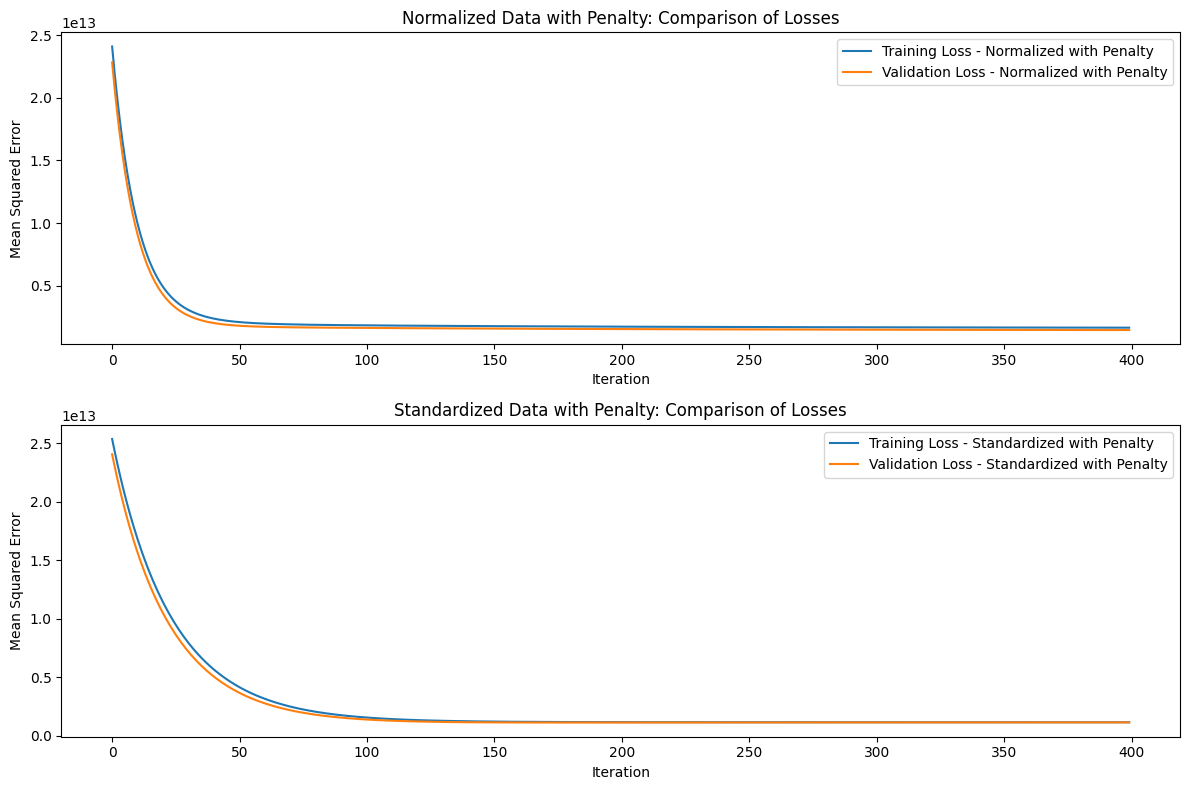

Best parameters with normalized data and penalty: [[2379802.47866593]
 [ 693285.91142857]
 [ 702956.44685778]
 [ 695661.06748252]
 [ 855355.83532203]]
Best parameters with standardized data and penalty: [[4794245.72913299]
 [ 496632.53849138]
 [ 100274.51863588]
 [ 535638.13443366]
 [ 342231.20152246]]


In [ ]:

# 1. Select the data for the specific input features and target output
selected_features_b = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']

X_b = df_train[selected_features_b].values
y_b = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_b
y_train = y_b
X_val = df_test[selected_features_b].values
y_val = df_test['price'].values.reshape(-1, 1)
# Function to run gradient descent with penalty
def run_gradient_descent_with_penalty(X_train, y_train, X_val, y_val, learning_rate, n_iterations, penalty):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        gradients[1:] += 2 * penalty * theta[1:]

        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# parameters
learning_rate = 0.01
n_iterations = 400
penalty = 0.1

# Run gradient descent for both normalized and standardized data with penalty
train_losses_normalized_penalty, val_losses_normalized_penalty, theta_normalized_penalty = run_gradient_descent_with_penalty(X_train_normalized, y_train, X_val_normalized, y_val, learning_rate, n_iterations, penalty)
train_losses_standardized_penalty, val_losses_standardized_penalty, theta_standardized_penalty = run_gradient_descent_with_penalty(X_train_standardized, y_train, X_val_standardized, y_val, learning_rate, n_iterations, penalty)

# Plotting for Normalized Data with penalty
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_losses_normalized_penalty, label="Training Loss - Normalized with Penalty")
plt.plot(val_losses_normalized_penalty, label="Validation Loss - Normalized with Penalty")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Data with Penalty: Comparison of Losses")

# Plotting for Standardized Data with penalty
plt.subplot(2, 1, 2)
plt.plot(train_losses_standardized_penalty, label="Training Loss - Standardized with Penalty")
plt.plot(val_losses_standardized_penalty, label="Validation Loss - Standardized with Penalty")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data with Penalty: Comparison of Losses")

plt.tight_layout()
plt.show()

# Print the best parameters
print("Best parameters with normalized data and penalty:", theta_normalized_penalty[:5])
print("Best parameters with standardized data and penalty:", theta_standardized_penalty[:5])


# 1A AND 1B using lower iteration to show loss

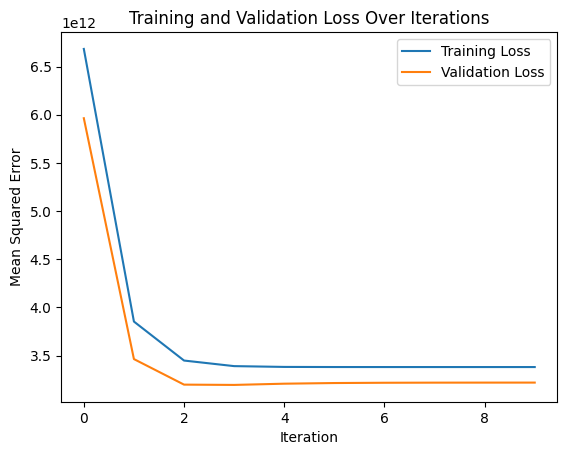

Best parameters: [2.14811956e-01 8.61862601e+02 6.97796647e-01 3.48937270e-01
 5.07559681e-01 1.78137854e-01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select the data for the specific input features and target output
selected_features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a = df_train[selected_features_a].values
y_a = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_a
y_train = y_a
X_val = df_test[selected_features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.00000001
n_iterations = 10
m = len(X_train)

# initial values
theta_1a = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta_1a) - y_train)
    theta_1a -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta_1a) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta_1a) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best parameters: {theta_1a.ravel()}")


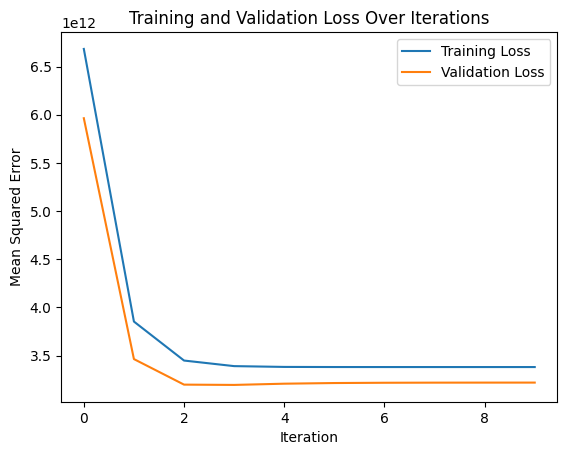

Best parameters: [2.14811946e-01 8.61862558e+02 6.97796616e-01 3.48937257e-01
 5.07559661e-01 1.91187916e-01 5.59824265e-02 9.57666100e-02
 2.14144857e-02 1.09964782e-01 1.78137847e-01 6.78880374e-02]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select the data for the specific input features and target output
selected_features_b = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']

X_b = df_train[selected_features_b].values
y_b = df_train['price'].values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_b
y_train = y_b
X_val = df_test[selected_features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.00000001
n_iterations = 10
m = len(X_train)

# initial values (initialize to zero)
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best parameters: {theta.ravel()}")
